In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

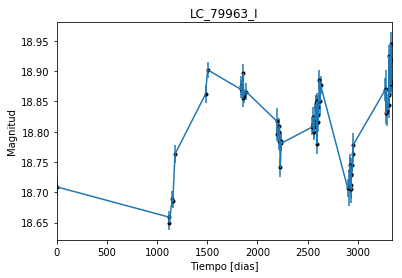

In [2]:
data = np.genfromtxt('LC_79963_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_79963_I')
plt.savefig("LC_79963_I.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

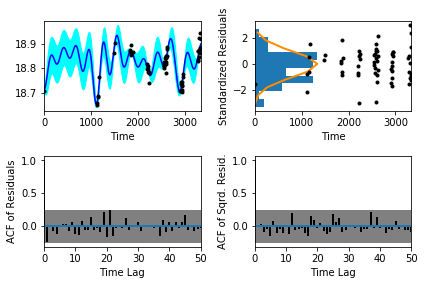

In [5]:
sample.assess_fit()

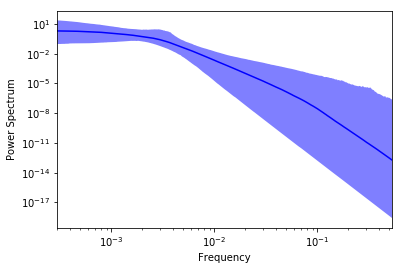

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

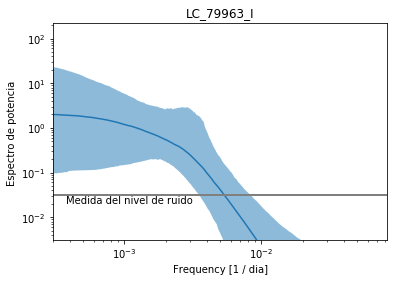

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_79963_I')
plt.savefig("Medida del nivel de ruido_I.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_79963_I')

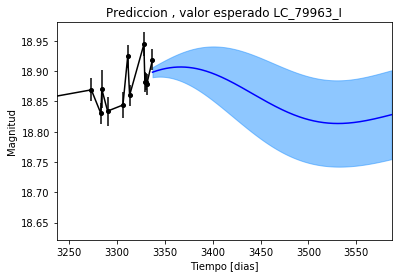

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_79963_I')

Text(0.5,1,'Prediccion, Caminos simulados_LC_79963_I')

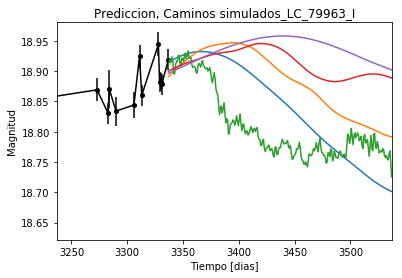

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_79963_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


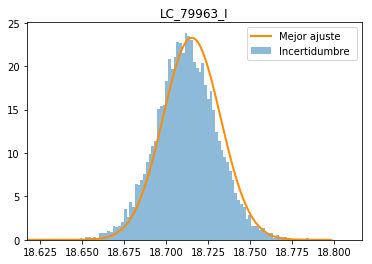

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_79963_I')
plt.savefig("Mejor_ajuste_LC_79963_I.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_79963_I')

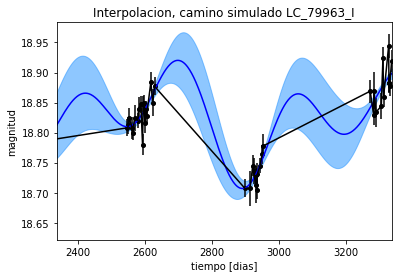

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_79963_I')

Text(0.5,1,'Interpolacion, camino simulado LC_79963_I')

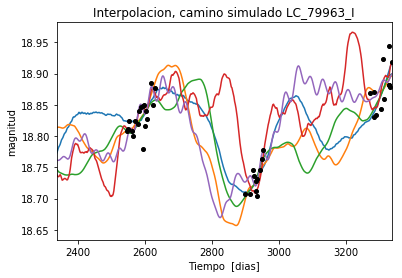

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_79963_I')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 685.313676342
Median: 0.00448090882461
Standard deviation: 0.177758029499
68% credibility interval: [ 0.00058816  0.1213069 ]
95% credibility interval: [  3.28024396e-04   6.98996565e-01]
99% credibility interval: [  3.07955503e-04   9.63307261e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 757.319729198
Median: 0.00175278830431
Standard deviation: 0.0846045282907
68% credibility interval: [ 0.00050751  0.01736688]
95% credibility interval: [ 0.00032261  0.26525638]
99% credibility interval: [  3.07319496e-04   6.13799640e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 680.243962238
Median: 0.00760994186745
Standar

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1094.41126464
Median: 159.235245859
Standard deviation: 1.83876875317
68% credibility interval: [ 157.34850319  160.71572072]
95% credibility interval: [ 154.77589275  162.17106367]
99% credibility interval: [ 152.66439502  162.75936335]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 351.915935722
Median: 0.319921147015
Standard deviation: 1.98642736942
68% credibility interval: [ 0.03771466  3.18903275]
95% credibility interval: [ 0.013345    6.64433812]
99% credibility interval: [  9.22157909e-03   9.72478254e+00]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 797.968704004
Median: 0.174375244967
Standard deviation: 9.02372120989
68% credibility interval: [  3.65792539e-03   6.38035393e+00]
95% credibility interv

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20020.0339014
Median: 2.97336379983e-28
Standard deviation: 2.17118509383e+28
68% credibility interval: [  5.48212713e-61   9.85889917e-03]
95% credibility interval: [  8.55223325e-118   5.18529541e+018]
99% credibility interval: [  8.12059341e-134   6.47132912e+021]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2597.79407256
Median: 18.8092300578
Standard deviation: 0.0444373522928
68% credibility interval: [ 18.77159228  18.84234762]
95% credibility interval: [ 18.71378205  18.89109412]
99% credibility interval: [ 18.64575047  18.94077932]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 710.365573051
Median: 0.0037252889734
Standard deviation: 0.244973227454
68% credibility interval: [ 0.          0.32332754]
95% credibility interval: [ 0.          0.92472234]
99% credibility interval: [ 0.         1.0177353]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 710.365573051
Median: 0.0037252889734
Standard deviation: 0.244973227454
68% credibility interval: [ 0.          0.32332754]
95% credibility interval: [ 0.          0.92472234]
99% credibility interval: [ 0.         1.0177353]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 327.664400014
Median: 0.0
Standard deviation: 0.0010737300611
68% credibil

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1094.41126464
Median: 159.235245859
Standard deviation: 1.83876875317
68% credibility interval: [ 157.34850319  160.71572072]
95% credibility interval: [ 154.77589275  162.17106367]
99% credibility interval: [ 152.66439502  162.75936335]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1368.20494774
Median: 0.00829863489976
Standard deviation: 0.0126631221049
68% credibility interval: [ 0.00491015  0.01629724]
95% credibility interval: [ 0.00321967  0.03977871]
99% credibility interval: [ 0.00252396  0.08273586]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1552.69771902
Median: 1.30710215186
Standard deviation: 0.200458052852
68% credibility interval: [ 1.12484097  1.51704581]
95% credibility interval: [ 0.97241718  1.76939172]
99% credibility interval: [ 0.88807391  1.91424292]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1152.70063919
Median: 3.32533768341e-05
Standard deviation: 0.0507564571342
68% credibility interval: [  2.59274906e-07   1.73720789e-03]
95% credibility interval: [  7.47996648e-24   2.87371552e-02]
99% credibility interval: [  6.30663673e-27   3.32582285e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 685.313676342
Median: (-0.0281543804896-1.21078123196j)
Standard deviation: 1.90173865457
68% credibility interval: [-0.76219375+0.j         -0.00369549-0.15415087j]
95% credibility interval: [ -4.39192495e+00+0.j          -2.06103806e-03-0.02235762j]
99% credibility interval: [ -6.05263803e+00-0.02196506j  -1.93494149e-03-0.02151595j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 757.319729198
Median: (-0.0110130937203+0.00875890662764j)
Standard deviation: 1.62842185735
68% credibility interval: [-0.10911930+0.1014737j -0.00318876+0.j       ]
95% credibility interval: [-1.66665501+2.60833256j -0.00202700+0.02000864j]
99% credibility interval: [ -3.85661688e+00+1.04325732j  -1.93094534e-03+0.28120354j]
Posterior sum